In [1]:
import numpy as np
import pandas as pd
#pd.set_option('display.max_rows', 100)
#pd.set_option('display.max_columns', 100)
from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource, Quad
from datetime import datetime
from math import pi
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, recall_score, precision_score
import random
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
t = time()

In [2]:
# Keras imports
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.convolutional import Convolution2D, MaxPooling2D, Conv1D, MaxPooling1D, AveragePooling1D, UpSampling1D
from keras.layers.recurrent import LSTM
from keras.layers import Bidirectional, TimeDistributed
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
from keras.optimizers import Adam, RMSprop
from keras.utils import np_utils, generic_utils
from sklearn.metrics import f1_score
from keras.models import Model
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from keras import regularizers
from keras.utils.np_utils import to_categorical
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping, Callback, ModelCheckpoint, LearningRateScheduler, ReduceLROnPlateau
from keras.layers.advanced_activations import LeakyReLU
from weightnorm import data_based_init, AdamWithWeightnorm
from keras.utils import np_utils
import keras.backend as K
from itertools import product
from functools import partial
from keras.layers.noise import GaussianNoise
from keras.layers.advanced_activations import ELU
from keras.constraints import maxnorm
from numpy.random import seed
from sklearn.preprocessing import minmax_scale
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense, Flatten, Input, merge, add
from keras.models import load_model

Using TensorFlow backend.


In [3]:
from sklearn import model_selection
from sklearn.preprocessing import Imputer
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn import cross_validation
from sklearn.model_selection import KFold
from matplotlib import pyplot
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GroupKFold

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 1

In [5]:
# Import custom scripts and functions
%aimport model_performance_evaluation
%aimport custom_metrics
%aimport data_processing
%aimport make_keras_generators

In [6]:
# !wget https://dl.dropboxusercontent.com/u/53977633/data/df072717611pm.csv
# !wget https://dl.dropboxusercontent.com/u/53977633/data/X072717611pm.csv
# !wget https://dl.dropboxusercontent.com/u/53977633/data/y072717611pm.csv

In [7]:
# X = pd.read_csv('/output/X072717611pm.csv')
# X.drop(X.columns[0], inplace=True, axis=1)
# y = pd.read_csv('/output/y072717611pm.csv')
# y.drop(y.columns[0], inplace=True, axis=1)
# df_ohlc_and_rectangles = pd.read_csv('/output/df072717611pm.csv')
# df_ohlc_and_rectangles.drop(df_ohlc_and_rectangles.columns[0], inplace=True, axis=1)

In [228]:
# Create list of target csvs
data = ["EURJPY1440.csv", "EURGBP1440.csv","USDCAD1440.csv","GBPUSD1440.csv",\
        "EURUSD14402.csv","USDCHF1440.csv","EURAUD14402.csv","AUDUSD1440.csv",\
               "GBPJPY1440.csv", "NZDUSD1440.csv", "EURUSD240.csv", 'indi_EURCAD_15.csv', 
       'indi_USDCAD_15.csv','indi_USDJPY_15.csv', 'indi_USDJPY_60.csv' ]

# allows us to easily modify how many days ahead and before we look:
lookforward = 6 # how many days we look forward
lookback = 6 # how many days we look back

        
# Choose features to be used in feature generation function
feature_generation_channels = ["O", "H", "L", "C", "V"] 

X, y, df_ohlc_and_rectangles, groups,\
groups_count, scalers, groups_dict,\
scaled_columns, df_data_unscaled,\
y_rects, proximal_columns, distal_columns = data_processing.prepare_data(data, 
                                                                 lookforward, 
                                                                 lookback,
                                                                 feature_generation_channels,
                                                                 lag_data=1,
                                                                 change_open_close=1, 
                                                                 range_high_low=1,
                                                                 rolling_mean_range_HL=1,
                                                                 range_high_close=1,
                                                                 std_dev=1,
                                                                 rolling_mean=1,
                                                                 change_open_close_shift=1,
                                                                 range_high_low_shift=0,
                                                                 range_high_close_shift=1,
                                                                 diff_shift=1,
                                                                 rolling_mean_shift=1,
                                                                 std_dev_shift=1,
                                                                 center=True
                                                                )

Processing:  EURJPY1440.csv Number  1  of  15
We now have: (0, 0) rows of data!
Reading in Date, OHLCV, Supply/Demand
Renaming df_ohlc column headers for clarity
Reading in Rectangle data
Renaming df_rects column headers for clarity
Identifying supply/demand with supply_or_demand func: EURJPY1440.csv (4950, 12)
~~~
Identifying zone ends with zone_ender func: EURJPY1440.csv (4950, 14)
~~~
Your df_norm columns: Index(['O', 'H', 'L', 'C', 'V'], dtype='object')
Your df_non_norm columns: Index(['Epoch Date', 'Supply/Demand', 'Object Name', 'Epoch Date Start',
       'Epoch Date End', 'Proximal', 'Distal', 'supply_demand',
       'rectangle_here', 'Proximal_match_-6_O',
       ...
       'Distal_match_-4_C', 'Distal_match_-3_C', 'Distal_match_-2_C',
       'Distal_match_-1_C', 'Distal_match_0_C', 'Distal_match_1_C',
       'Distal_match_2_C', 'Distal_match_3_C', 'Distal_match_4_C',
       'Distal_match_5_C'],
      dtype='object', length=105)
Generating features:  Difference between open and

/Users/production204/Github/the-internet-of-forex/data_processing.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_data["change_open_close"] = df_data["O"] - df_data["C"] # add change column, difference between open and close
/Users/production204/Github/the-internet-of-forex/data_processing.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_data["range_high_low"] = df_data["H"] - df_data["L"] # add range, difference between high and low
/Users/production204/Github/the-internet-of-forex/data_processing.py:63: SettingWithCopyWarni

Shape is now: (4950, 6)
~~~
Generating features:  Range between high and low
Shape is now: (4950, 7)
~~~
Generating features:  Range between high and low
Shape is now: (4950, 8)
~~~


/Users/production204/Github/the-internet-of-forex/data_processing.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_data[label] =  df_data[each].rolling(window=6).std()
/Users/production204/Github/the-internet-of-forex/data_processing.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_data[label] =  df_data[each].rolling(window=6, center=center).mean()
/Users/production204/Github/the-internet-of-forex/data_processing.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

Generating features:  Generic lagged data
Generating features:  Change over time for lookforward/lookback range
Generating features:  Range High-Close over time for lookforward/lookback range
Generating features:  Diffs over time for lookforward/lookback range
Generating features:  Rolling mean for yesterday, today, tomorrow range
Generating features:  Std deviation for yesterday, today, tomorrow range
Your df_scale_with_PCA: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135,

Generating features:  Std deviation for yesterday, today, tomorrow range
Your df_scale_with_PCA: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 20

Your df_scale_with_PCA: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 

Identifying supply/demand with supply_or_demand func: EURUSD14402.csv (4949, 12)
~~~
Identifying zone ends with zone_ender func: EURUSD14402.csv (4949, 14)
~~~
Your df_norm columns: Index(['O', 'H', 'L', 'C', 'V'], dtype='object')
Your df_non_norm columns: Index(['Epoch Date', 'Supply/Demand', 'Object Name', 'Epoch Date Start',
       'Epoch Date End', 'Proximal', 'Distal', 'supply_demand',
       'rectangle_here', 'Proximal_match_-6_O',
       ...
       'Distal_match_-4_C', 'Distal_match_-3_C', 'Distal_match_-2_C',
       'Distal_match_-1_C', 'Distal_match_0_C', 'Distal_match_1_C',
       'Distal_match_2_C', 'Distal_match_3_C', 'Distal_match_4_C',
       'Distal_match_5_C'],
      dtype='object', length=105)
Generating features:  Difference between open and close
Shape is now: (4949, 6)
~~~
Generating features:  Range between high and low
Shape is now: (4949, 7)
~~~
Generating features:  Range between high and low
Shape is now: (4949, 8)
~~~
Generating features:  Generic lagged data


Identifying zone ends with zone_ender func: USDCHF1440.csv (4887, 14)
~~~
Your df_norm columns: Index(['O', 'H', 'L', 'C', 'V'], dtype='object')
Your df_non_norm columns: Index(['Epoch Date', 'Supply/Demand', 'Object Name', 'Epoch Date Start',
       'Epoch Date End', 'Proximal', 'Distal', 'supply_demand',
       'rectangle_here', 'Proximal_match_-6_O',
       ...
       'Distal_match_-4_C', 'Distal_match_-3_C', 'Distal_match_-2_C',
       'Distal_match_-1_C', 'Distal_match_0_C', 'Distal_match_1_C',
       'Distal_match_2_C', 'Distal_match_3_C', 'Distal_match_4_C',
       'Distal_match_5_C'],
      dtype='object', length=105)
Generating features:  Difference between open and close
Shape is now: (4887, 6)
~~~
Generating features:  Range between high and low
Shape is now: (4887, 7)
~~~
Generating features:  Range between high and low
Shape is now: (4887, 8)
~~~
Generating features:  Generic lagged data
Generating features:  Change over time for lookforward/lookback range
Generating featu

Your df_norm columns: Index(['O', 'H', 'L', 'C', 'V'], dtype='object')
Your df_non_norm columns: Index(['Epoch Date', 'Supply/Demand', 'Object Name', 'Epoch Date Start',
       'Epoch Date End', 'Proximal', 'Distal', 'supply_demand',
       'rectangle_here', 'Proximal_match_-6_O',
       ...
       'Distal_match_-4_C', 'Distal_match_-3_C', 'Distal_match_-2_C',
       'Distal_match_-1_C', 'Distal_match_0_C', 'Distal_match_1_C',
       'Distal_match_2_C', 'Distal_match_3_C', 'Distal_match_4_C',
       'Distal_match_5_C'],
      dtype='object', length=105)
Generating features:  Difference between open and close
Shape is now: (4624, 6)
~~~
Generating features:  Range between high and low
Shape is now: (4624, 7)
~~~
Generating features:  Range between high and low
Shape is now: (4624, 8)
~~~
Generating features:  Generic lagged data
Generating features:  Change over time for lookforward/lookback range
Generating features:  Range High-Close over time for lookforward/lookback range
Generating

Generating features:  Range between high and low
Shape is now: (4951, 8)
~~~
Generating features:  Generic lagged data
Generating features:  Change over time for lookforward/lookback range
Generating features:  Range High-Close over time for lookforward/lookback range
Generating features:  Diffs over time for lookforward/lookback range
Generating features:  Rolling mean for yesterday, today, tomorrow range
Generating features:  Std deviation for yesterday, today, tomorrow range
Your df_scale_with_PCA: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 12

Generating features:  Generic lagged data
Generating features:  Change over time for lookforward/lookback range
Generating features:  Range High-Close over time for lookforward/lookback range
Generating features:  Diffs over time for lookforward/lookback range
Generating features:  Rolling mean for yesterday, today, tomorrow range
Generating features:  Std deviation for yesterday, today, tomorrow range
Your df_scale_with_PCA: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135,

Your df_scale_with_PCA: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 

Finished: EURUSD240.csv (8749, 370)
--------------------------------
Processing:  indi_EURCAD_15.csv Number  12  of  15
We now have: (57481, 370) rows of data!
Reading in Date, OHLCV, Supply/Demand
Renaming df_ohlc column headers for clarity
Reading in Rectangle data
Renaming df_rects column headers for clarity
Identifying supply/demand with supply_or_demand func: indi_EURCAD_15.csv (10346, 12)
~~~
Identifying zone ends with zone_ender func: indi_EURCAD_15.csv (10346, 14)
~~~
Your df_norm columns: Index(['O', 'H', 'L', 'C', 'V'], dtype='object')
Your df_non_norm columns: Index(['Epoch Date', 'Supply/Demand', 'Object Name', 'Epoch Date Start',
       'Epoch Date End', 'Proximal', 'Distal', 'supply_demand',
       'rectangle_here', 'Proximal_match_-6_O',
       ...
       'Distal_match_-4_C', 'Distal_match_-3_C', 'Distal_match_-2_C',
       'Distal_match_-1_C', 'Distal_match_0_C', 'Distal_match_1_C',
       'Distal_match_2_C', 'Distal_match_3_C', 'Distal_match_4_C',
       'Distal_match_

Identifying zone ends with zone_ender func: indi_USDCAD_15.csv (10285, 14)
~~~
Your df_norm columns: Index(['O', 'H', 'L', 'C', 'V'], dtype='object')
Your df_non_norm columns: Index(['Epoch Date', 'Supply/Demand', 'Object Name', 'Epoch Date Start',
       'Epoch Date End', 'Proximal', 'Distal', 'supply_demand',
       'rectangle_here', 'Proximal_match_-6_O',
       ...
       'Distal_match_-4_C', 'Distal_match_-3_C', 'Distal_match_-2_C',
       'Distal_match_-1_C', 'Distal_match_0_C', 'Distal_match_1_C',
       'Distal_match_2_C', 'Distal_match_3_C', 'Distal_match_4_C',
       'Distal_match_5_C'],
      dtype='object', length=105)
Generating features:  Difference between open and close
Shape is now: (10285, 6)
~~~
Generating features:  Range between high and low
Shape is now: (10285, 7)
~~~
Generating features:  Range between high and low
Shape is now: (10285, 8)
~~~
Generating features:  Generic lagged data
Generating features:  Change over time for lookforward/lookback range
Generati

Your df_norm columns: Index(['O', 'H', 'L', 'C', 'V'], dtype='object')
Your df_non_norm columns: Index(['Epoch Date', 'Supply/Demand', 'Object Name', 'Epoch Date Start',
       'Epoch Date End', 'Proximal', 'Distal', 'supply_demand',
       'rectangle_here', 'Proximal_match_-6_O',
       ...
       'Distal_match_-4_C', 'Distal_match_-3_C', 'Distal_match_-2_C',
       'Distal_match_-1_C', 'Distal_match_0_C', 'Distal_match_1_C',
       'Distal_match_2_C', 'Distal_match_3_C', 'Distal_match_4_C',
       'Distal_match_5_C'],
      dtype='object', length=105)
Generating features:  Difference between open and close
Shape is now: (10282, 6)
~~~
Generating features:  Range between high and low
Shape is now: (10282, 7)
~~~
Generating features:  Range between high and low
Shape is now: (10282, 8)
~~~
Generating features:  Generic lagged data
Generating features:  Change over time for lookforward/lookback range
Generating features:  Range High-Close over time for lookforward/lookback range
Generat

Generating features:  Difference between open and close
Shape is now: (3323, 6)
~~~
Generating features:  Range between high and low
Shape is now: (3323, 7)
~~~
Generating features:  Range between high and low
Shape is now: (3323, 8)
~~~
Generating features:  Generic lagged data
Generating features:  Change over time for lookforward/lookback range
Generating features:  Range High-Close over time for lookforward/lookback range
Generating features:  Diffs over time for lookforward/lookback range
Generating features:  Rolling mean for yesterday, today, tomorrow range
Generating features:  Std deviation for yesterday, today, tomorrow range
Your df_scale_with_PCA: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 8

In [229]:
# Save data into backup X, y so we don't have to reload it 

X_backup = X
y_backup = y

In [230]:
X = X_backup
y = y_backup

In [223]:
labels_distal = [col for col in list(y) if col.startswith('Distal_')]
labels_proximal = [col for col in list(y) if col.startswith('Proximal_')]
labels_rectangle_here = [col for col in list(y) if col.startswith('rectangle_')]

In [235]:
features_to_remove = ['Epoch Date', 'Supply/Demand', 'Object Name', 'Epoch Date Start', 'L_diff_0', 'O_diff_0',
                      'Epoch Date End', 'Proximal', 'Distal', 'change', 'V_diff_0', 'C_diff_0', 'H_diff_0',
                      'O', 'H', 'L', 'C', 
                      'csv_origin_tag', 'range_high_close_range_0', 'change_open_close', 'range_high_close', 
                      'rectangle_here', 
                      'supply_demand', 'group']


X = data_processing.drop_non_features(X, features_to_remove, zero_columns=1)

In [236]:
# Create train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y['rectangle_here'], test_size=0.10, random_state=0)

# Create validation split from train split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.05, random_state=0)

In [240]:
# Stack to 3dim for 1D conv net
X_train = data_processing.X_to_Conv1D_arrays(X_train)
X_valid = data_processing.X_to_Conv1D_arrays(X_valid)
X_test = data_processing.X_to_Conv1D_arrays(X_test)

X:  (78417, 242, 1)
X:  <class 'numpy.ndarray'>
X:  (4128, 242, 1)
X:  <class 'numpy.ndarray'>
X:  (9172, 242, 1)
X:  <class 'numpy.ndarray'>


### LSTM for Rectangle_here

In [244]:
# Create generators and define batch_size and other hyperparams
batch_size = 64

# Create generators
train_gen = make_keras_generators.train_generator(X_train, y_train.values, batch_size)
valid_gen = make_keras_generators.valid_generator(X_valid, y_valid.values, batch_size)

input_shape = X_train.shape[1:3]
output_shape = 1
validation_steps = int(len(X_valid)/batch_size)+1
steps_per_epoch = int(len(X_train)/batch_size)+1
epochs = 200
multiplier = 1

validation_steps = int(len(X_valid)/batch_size)+1

class_weight={0:1., 1:7.}

In [245]:
mc_filepath = '/weights-{epoch:02d}-{val_fbeta_score:.2f}.h5'
mc = ModelCheckpoint(mc_filepath, 
                     monitor='val_fbeta_score', 
                     verbose=1, 
                     #save_weights_only=True,
                     period=10, mode='auto'
                     save_best_only=False)

rlop = ReduceLROnPlateau(
                    monitor='val_loss', 
                    mode='min',
                    factor=0.6,
                    patience=10, 
                    min_lr=0.00001,
                    verbose=1,
                        )

es = EarlyStopping(
        monitor='val_fbeta_score',
        min_delta=0.01,
        mode='max',
        patience=20,
        verbose=1)



callbacks = [ es, rlop, mc]

### Define the rectangle_here_model

In [246]:
rectangle_here_model = Sequential()
rectangle_here_model.add(Bidirectional(LSTM(128, return_sequences=False,
                                     recurrent_dropout=0.3, dropout=0.3), 
                                 input_shape=input_shape, 
                                 batch_input_shape=(None, X_train.shape[1], X_train.shape[2])))
rectangle_here_model.add(Dense(output_shape, activation='sigmoid'))

In [248]:
rectangle_here_model.compile(optimizer=AdamWithWeightnorm(lr=0.0125), 
              loss='binary_crossentropy',
                metrics = ['accuracy', 
                           custom_metrics.fbeta_score,
                           custom_metrics.recall,
                          custom_metrics.precision,]
            )


history = rectangle_here_model.fit_generator(
                    train_gen,
                    steps_per_epoch=int(len(X_train)/batch_size)+1,
                    epochs=epochs,
                    verbose=1,
                    callbacks=callbacks,
                    #max_q_size=1,
                    #pickle_safe=False,
                    validation_data = valid_gen,
                    class_weight = class_weight,
                    validation_steps = validation_steps
                   )

Epoch 1/5
1226/1226 [==============================] - 1664s - loss: 1.0687 - acc: 0.7905 - fbeta_score: 0.1485 - recall: 0.2270 - precision: 0.1434 - val_loss: 0.5610 - val_acc: 0.8081 - val_fbeta_score: 0.1872 - val_recall: 0.2559 - val_precision: 0.1594
Epoch 2/5
1226/1226 [==============================] - 1944s - loss: 1.0514 - acc: 0.7557 - fbeta_score: 0.1994 - recall: 0.3361 - precision: 0.1586 - val_loss: 0.5373 - val_acc: 0.7980 - val_fbeta_score: 0.2146 - val_recall: 0.3208 - val_precision: 0.1722
Epoch 3/5
1226/1226 [==============================] - 1700s - loss: 1.0400 - acc: 0.7515 - fbeta_score: 0.2087 - recall: 0.3626 - precision: 0.1631 - val_loss: 0.4703 - val_acc: 0.8123 - val_fbeta_score: 0.2365 - val_recall: 0.3375 - val_precision: 0.1957
Epoch 4/5
1226/1226 [==============================] - 1681s - loss: 1.0550 - acc: 0.7560 - fbeta_score: 0.1822 - recall: 0.3111 - precision: 0.1486 - val_loss: 0.5725 - val_acc: 0.7900 - val_fbeta_score: 0.1899 - val_recall: 0.2

In [250]:
rectangle_here_model.save('rectangle_here_model-07.05.17.630pm.h5')

In [258]:
preds, y_pred_proba = model_performance_evaluation.eval(rectangle_here_model, 
                                                        X_test, 
                                                        y_test.values, 
                                                        batch_size=64, sensitivity=0.1, binary=1, sequential=0)

Your classification report: 
             precision    recall  f1-score   support

          0       0.00      0.00      0.00      8282
          1       0.10      1.00      0.18       890

avg / total       0.01      0.10      0.02      9172

-----------------------------
Log loss: 0.568749836793
F1 weighted: 0.0171657052051
F1 macro: 0.0884516000795
F1 micro: 0.0970344526821
Accuracy score: 0.0970344526821
Hamming Loss: 0.902965547318
ROC AUC SCORE: 0.648796632198
Your confusion matrix: 
[[   0 8282]
 [   0  890]]
-----------------------------


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


dict_keys(['val_fbeta_score', 'val_loss', 'val_acc', 'val_precision', 'lr', 'acc', 'val_recall', 'loss', 'fbeta_score', 'recall', 'precision'])


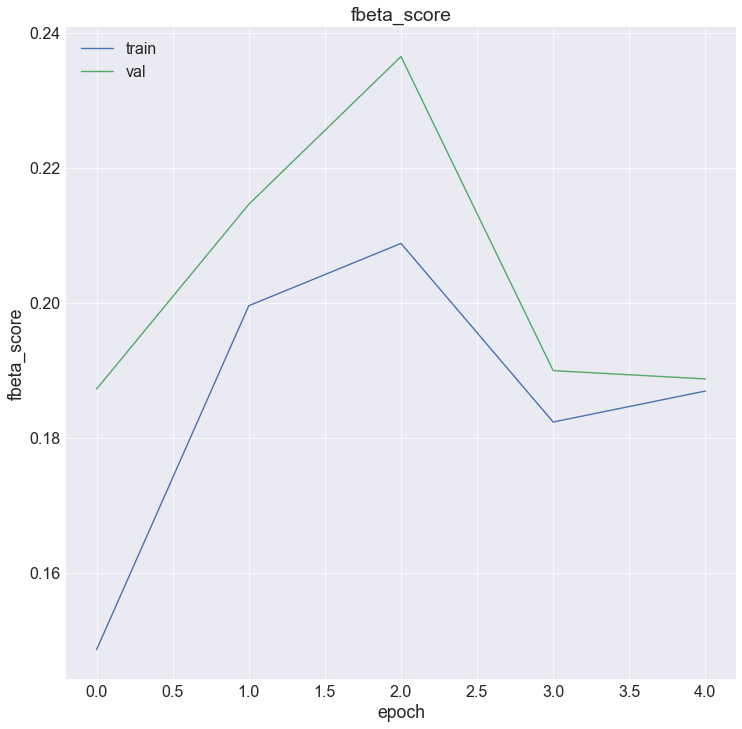

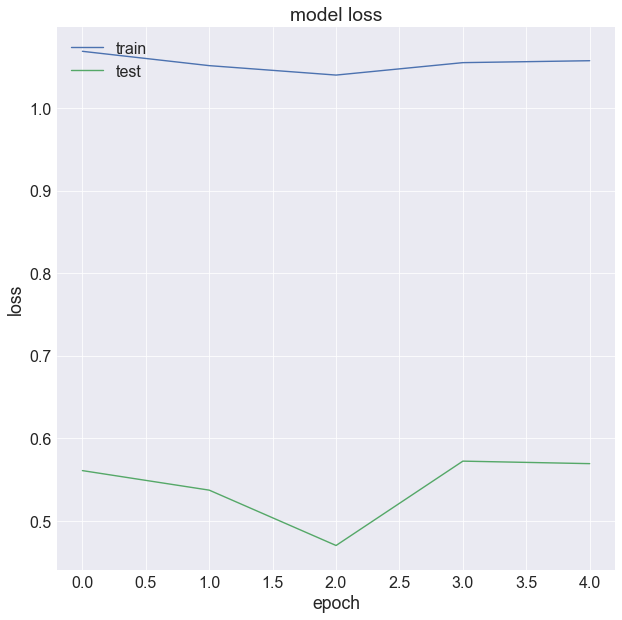

dict_keys(['val_fbeta_score', 'val_loss', 'val_acc', 'val_precision', 'lr', 'acc', 'val_recall', 'loss', 'fbeta_score', 'recall', 'precision'])


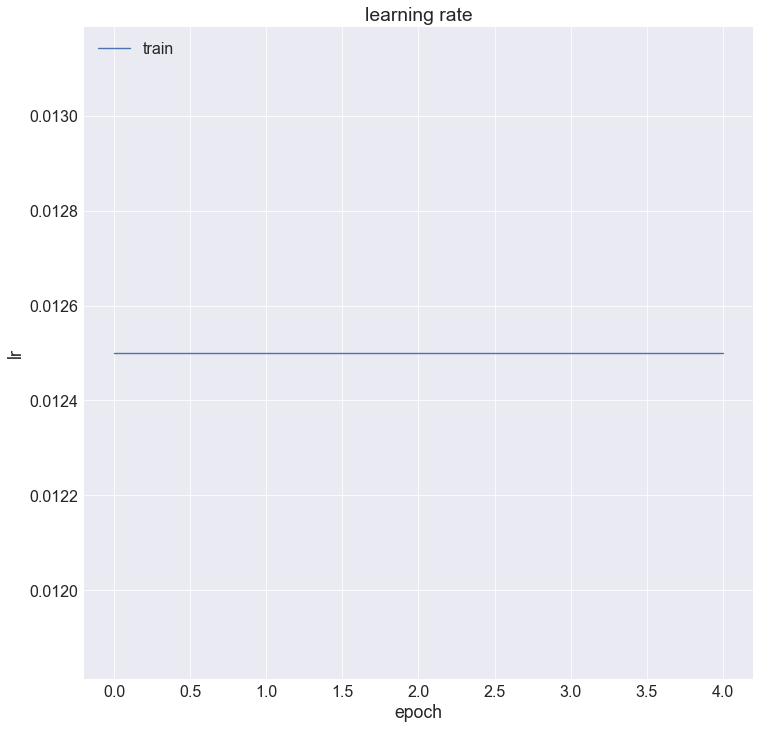

In [252]:
sns.set_context("paper", font_scale=2)
plt.figure(figsize=(12, 12))
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['fbeta_score'])
plt.plot(history.history['val_fbeta_score'])
plt.title('fbeta_score')
plt.ylabel('fbeta_score')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


# summarize history for loss
fig_loss = plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# show lr changing
sns.set_context("paper", font_scale=2)
plt.figure(figsize=(12, 12))
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['lr'])
#plt.plot(history.history['val_fbeta_score'])
plt.title('learning rate')
plt.ylabel('lr')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# For lining up predictions and labels
df_predictions = pd.DataFrame(preds.astype(int))
df_pred_test_compare = pd.concat([df_predictions, pd.DataFrame(y_train).reset_index()], 
                         axis=1, 
                         ignore_index=True)  
df_pred_test_compare.columns=['predicted', 'idx', 'true']

## Train models for Proximal and Distal matching

##### Proximal data prep

In [254]:
# Make list of features and label column names
features = [col for col in list(X)]
labels = labels_proximal
reduced_match_list = ['Proximal_match_1_C', 
                      'Proximal_match_0_C', 
                      'Proximal_match_0_O', 
                      'Proximal_match_-1_O']

# Select only rows that contain zones
df_zones = df_ohlc_and_rectangles.loc[df_ohlc_and_rectangles['rectangle_here'] == 1]

# Split out the new df into features and labels
df_X = df_zones[features]
df_y = df_zones[reduced_match_list]

# Drop features from X
features_to_remove = ['Epoch Date', 'Supply/Demand', 'Object Name', 'Epoch Date Start', 'L_diff_0', 'O_diff_0',
                      'Epoch Date End', 'Proximal', 'Distal', 'change', 'V_diff_0', 'C_diff_0', 'H_diff_0',
                      #'O', 'H', 'L', 'C', 
                      'csv_origin_tag', 'range_high_close_range_0', 'change_open_close', 'range_high_close', 
                      'rectangle_here', 'supply_demand', 'group']

df_X = data_processing.drop_non_features(df_X, features_to_remove, zero_columns=1)
df_y = data_processing.drop_non_features(df_y, ['Proximal'], zero_columns=1)

# Clean up duplicate labels (i.e. where multiple matches were found)
df_y = df_y.apply(lambda x:x.drop_duplicates(), axis=1).fillna(False)

print(df_y.shape)

(8945, 4)


In [256]:
# Sort multi-one-hot encoded label rows by those with the most 1s
# Sort rows by those that add up to the highest value (change to True for descending)
idx = df_y.sum(axis=1).sort_values(ascending=True).head(30).index
df_y_ = df_y.ix[idx]

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  after removing the cwd from sys.path.


In [260]:
df_y['sum'] = df_y.sum(axis=1)

In [261]:
df_y['sum'].value_counts(normalize=True)

1    0.953605
0    0.046395
Name: sum, dtype: float64

In [ ]:
# Create train/test split
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.10, random_state=0)

# Create validation split from train split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.05, random_state=0)

In [ ]:
# Stack to 3dim for 1D conv net
X_train = data_processing.X_to_Conv1D_arrays(X_train)
X_valid = data_processing.X_to_Conv1D_arrays(X_valid)
X_test = data_processing.X_to_Conv1D_arrays(X_test)

In [ ]:
# Create generators and define batch_size and other hyperparams
batch_size = 64

# Create generators
train_gen = make_keras_generators.train_generator(X_train, y_train.values, batch_size)
valid_gen = make_keras_generators.valid_generator(X_valid, y_valid.values, batch_size)

input_shape = X_train.shape[1:3]
output_shape = df_y.shape[1]
validation_steps = int(len(X_valid)/batch_size)+1
steps_per_epoch = int(len(X_train)/batch_size)+1
epochs = 150

validation_steps = int(len(X_valid)/batch_size)+1

###### Proximal model

In [ ]:
# Let's try transfer learning
# proximal_model = load_model('rectangle_here_model-07.05.17.630pm.h5', custom_objects={'AdamWithWeightnorm': AdamWithWeightnorm, 'fbeta_score': custom_metrics.fbeta_score, 'recall': custom_metrics.recall, 'precision': custom_metrics.precision})

In [ ]:
# proximal_model.summary()

In [ ]:
# Remove the dense layer
# proximal_model.layers.pop()
# proximal_model.summary()

In [ ]:
# x = Dropout(0.2)(proximal_model.layers[-1].output)
# x = Dense(output_shape)(x)
# x = Activation('softmax', name='final_activation_layer')(x)

# proximal_model_input = proximal_model.input
# proximal_model = Model(input=proximal_model_input, output=[x])
# proximal_model.summary()

In [ ]:
# Freeze the main LSTM layer
# layer.trainable = False

In [ ]:
# Use this cell if we want to start from scratch
proximal_model = Sequential()
proximal_model.add(Bidirectional(LSTM(128, return_sequences=False,
                                     recurrent_dropout=0.2, dropout=0.2), 
                                 input_shape=input_shape, 
                                 batch_input_shape=(None, X_train.shape[1], X_train.shape[2])))
proximal_model.add(Dense(output_shape, activation='softmax'))

In [ ]:
# Normal-ish learning rate set for transfer-learning
# proximal_model.compile(optimizer=AdamWithWeightnorm(lr=0.125), 
#               loss='categorical_crossentropy',
#                 metrics = ['accuracy', 
#                            custom_metrics.fbeta_score,
#                            custom_metrics.recall,
#                           custom_metrics.precision,]
#             )


# history = proximal_model.fit_generator(
#                     train_gen,
#                     steps_per_epoch=int(len(X_train)/batch_size)+1,
#                     epochs=epochs,
#                     verbose=1,
#                     callbacks=callbacks,
#                     #max_q_size=1,
#                     #pickle_safe=False,
#                     validation_data = valid_gen,
#                     class_weight = class_weight,
#                     validation_steps = validation_steps
#                    )

In [ ]:
# Un-freeze the main LSTM layer and re-train with the last dense layer stabilized
# layer.trainable = True

In [ ]:
# Extra low learning rate set for fine tuning
proximal_model.compile(optimizer=AdamWithWeightnorm(lr=0.000125), 
              loss='categorical_crossentropy',
                metrics = ['accuracy', 
                           custom_metrics.fbeta_score,
                           custom_metrics.recall,
                          custom_metrics.precision,]
            )


history = proximal_model.fit_generator(
                    train_gen,
                    steps_per_epoch=int(len(X_train)/batch_size)+1,
                    epochs=epochs,
                    verbose=1,
                    callbacks=callbacks,
                    #max_q_size=1,
                    #pickle_safe=False,
                    validation_data = valid_gen,
                    class_weight = class_weight,
                    validation_steps = validation_steps
                   )

In [ ]:
# See how we improved after fine-tuning
preds, y_pred_proba = model_performance_evaluation.eval(proximal_model, X_test, y_test.values, batch_size=64, sensitivity=0.5, binary=1, sequential=0)

In [ ]:
sns.set_context("paper", font_scale=2)
plt.figure(figsize=(12, 12))
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['fbeta_score'])
plt.plot(history.history['val_fbeta_score'])
plt.title('fbeta_score')
plt.ylabel('fbeta_score')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


# summarize history for loss
fig_loss = plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# show lr changing
sns.set_context("paper", font_scale=2)
plt.figure(figsize=(12, 12))
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['lr'])
#plt.plot(history.history['val_fbeta_score'])
plt.title('learning rate')
plt.ylabel('lr')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
proximal_model.save('proximal_model-07.05.17.h5')

##### Distal data prep

In [265]:
# Make list of features and label column names
features = [col for col in list(X)]
labels = labels_distal
reduced_distal_match_list = ['Distal_match_-1_H', 
                              'Distal_match_0_H', 
                              'Distal_match_1_H', 
                              'Distal_match_2_H', 
                              'Distal_match_-1_L', 
                              'Distal_match_0_L',
                              'Distal_match_1_L',
                              'Distal_match_2_L']

# Select only rows that contain zones
df_zones = df_ohlc_and_rectangles.loc[df_ohlc_and_rectangles['rectangle_here'] == 1]

# Split out the new df into features and labels
df_X = df_zones[features]
df_y = df_zones[reduced_distal_match_list]

# Drop features from X
features_to_remove = ['Epoch Date', 'Supply/Demand', 'Object Name', 'Epoch Date Start', 'L_diff_0', 'O_diff_0',
                      'Epoch Date End', 'Proximal', 'Distal', 'change', 'V_diff_0', 'C_diff_0', 'H_diff_0',
                      #'O', 'H', 'L', 'C', 
                      'csv_origin_tag', 'range_high_close_range_0', 'change_open_close', 'range_high_close', 
                      'rectangle_here', 'supply_demand', 'group']

df_X = data_processing.drop_non_features(df_X, features_to_remove, zero_columns=1)
df_y = data_processing.drop_non_features(df_y, ['Distal'], zero_columns=1)

# Clean up duplicate labels (i.e. where multiple matches were found)
df_y = df_y.apply(lambda x:x.drop_duplicates(), axis=1).fillna(False)

# Delete rows where there's 0 as the sum (aka anything in the minority classes we excluded above)
df_y['sum'] = df_y.sum(axis=1)
df_y = df_y[df_y['sum'] != 0]

print(df_y.shape)

(8639, 9)


In [ ]:
# Create train/test split
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.10, random_state=0)

# Create validation split from train split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.05, random_state=0)

In [ ]:
# Stack to 3dim for 1D conv net
X_train = data_processing.X_to_Conv1D_arrays(X_train)
X_valid = data_processing.X_to_Conv1D_arrays(X_valid)
X_test = data_processing.X_to_Conv1D_arrays(X_test)

###### Distal model

In [ ]:
# Create generators and define batch_size and other hyperparams
batch_size = 64

# Create generators
train_gen = make_keras_generators.train_generator(X_train, y_train.values, batch_size)
valid_gen = make_keras_generators.valid_generator(X_valid, y_valid.values, batch_size)

input_shape = X_train.shape[1:3]
output_shape = df_y.shape[1]
validation_steps = int(len(X_valid)/batch_size)+1
steps_per_epoch = int(len(X_train)/batch_size)+1
epochs = 150

validation_steps = int(len(X_valid)/batch_size)+1

In [ ]:
# Let's try transfer learning
# distal_model = load_model('rectangle_here_model-07.05.17.630pm.h5', custom_objects={'AdamWithWeightnorm': AdamWithWeightnorm, 'fbeta_score': custom_metrics.fbeta_score, 'recall': custom_metrics.recall, 'precision': custom_metrics.precision})

In [ ]:
# distal_model.summary()

In [ ]:
# Remove the dense layer
# distal_model.layers.pop()
# distal_model.summary()

In [ ]:
# x = Dropout(0.2)(distal_model.layers[-1].output)
# x = Dense(output_shape)(x)
# x = Activation('softmax', name='final_activation_layer')(x)

# distal_model_input = distal_model.input
# distal_model = Model(input=distal_model_input, output=[x])
# distal_model.summary()

In [ ]:
# Freeze the main LSTM layer
# layer.trainable = False

In [ ]:
#Use this cell if we want to start from scratch
distal_model = Sequential()
distal_model.add(Bidirectional(LSTM(128, return_sequences=False,
                                     recurrent_dropout=0.2, dropout=0.2), 
                                 input_shape=input_shape, 
                                 batch_input_shape=(None, X_train.shape[1], X_train.shape[2])))
distal_model.add(Dense(output_shape, activation='softmax'))

In [ ]:
# Normal-ish learning rate set for transfer-learning
distal_model.compile(optimizer=AdamWithWeightnorm(lr=0.125), 
              loss='categorical_crossentropy',
                metrics = ['accuracy', 
                           custom_metrics.fbeta_score,
                           custom_metrics.recall,
                          custom_metrics.precision,]
            )


history = distal_model.fit_generator(
                    train_gen,
                    steps_per_epoch=int(len(X_train)/batch_size)+1,
                    epochs=epochs,
                    verbose=1,
                    callbacks=callbacks,
                    #max_q_size=1,
                    #pickle_safe=False,
                    validation_data = valid_gen,
                    class_weight = class_weight,
                    validation_steps = validation_steps
                   )

In [ ]:
# Un-freeze the main LSTM layer and re-train with the last dense layer stabilized
# layer.trainable = True

In [ ]:
# Extra low learning rate set for fine tuning
# distal_model.compile(optimizer=AdamWithWeightnorm(lr=0.000125), 
#               loss='categorical_crossentropy',
#                 metrics = ['accuracy', 
#                            custom_metrics.fbeta_score,
#                            custom_metrics.recall,
#                           custom_metrics.precision,]
#             )


# history = distal_model.fit_generator(
#                     train_gen,
#                     steps_per_epoch=int(len(X_train)/batch_size)+1,
#                     epochs=epochs,
#                     verbose=1,
#                     callbacks=callbacks,
#                     validation_data = valid_gen,
#                     class_weight = class_weight,
#                     validation_steps = validation_steps
#                    )

In [ ]:
# See how we improved after fine-tuning
preds, y_pred_proba = model_performance_evaluation.eval(distal_model, X_test, y_test.values, batch_size=64, sensitivity=0.5, binary=1, sequential=0)

In [ ]:
sns.set_context("paper", font_scale=2)
plt.figure(figsize=(12, 12))
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['fbeta_score'])
plt.plot(history.history['val_fbeta_score'])
plt.title('fbeta_score')
plt.ylabel('fbeta_score')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


# summarize history for loss
fig_loss = plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# show lr changing
sns.set_context("paper", font_scale=2)
plt.figure(figsize=(12, 12))
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['lr'])
#plt.plot(history.history['val_fbeta_score'])
plt.title('learning rate')
plt.ylabel('lr')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
distal_model.save('distal_model-07.05.17.h5')

# Make predictions on raw data and visualize

In [151]:
data = ['floyd-ignore/USDCAD1440.csv']

# allows us to easily modify how many days ahead and before we look:
lookforward = 6 # how many days we look forward
lookback = 6 # how many days we look back

        
# Choose features to be used in feature generation function
feature_generation_channels = ["O", "H", "L", "C", "V"] 

X, y, df_ohlc_and_rectangles, groups,\
groups_count, scalers, groups_dict,\
scaled_columns, df_data_unscaled,\
y_rects, proximal_columns, distal_columns = data_processing.prepare_data(data, 
                                                                 lookforward, 
                                                                 lookback,
                                                                 feature_generation_channels,
                                                                 lag_data=1,
                                                                 change_open_close=1, 
                                                                 range_high_low=1,
                                                                 rolling_mean_range_HL=1,
                                                                 range_high_close=1,
                                                                 std_dev=1,
                                                                 rolling_mean=1,
                                                                 change_open_close_shift=1,
                                                                 range_high_low_shift=0,
                                                                 range_high_close_shift=1,
                                                                 diff_shift=1,
                                                                 rolling_mean_shift=1,
                                                                 std_dev_shift=1,
                                                                 center=True
                                                                )

Processing:  floyd-ignore/USDCAD1440.csv Number  1  of  1
We now have: (0, 0) rows of data!
Reading in Date, OHLCV, Supply/Demand
Renaming df_ohlc column headers for clarity
Reading in Rectangle data
Renaming df_rects column headers for clarity
Identifying supply/demand with supply_or_demand func: floyd-ignore/USDCAD1440.csv (4943, 12)
~~~
Identifying zone ends with zone_ender func: floyd-ignore/USDCAD1440.csv (4943, 14)
~~~
Your df_norm columns: Index(['O', 'H', 'L', 'C', 'V'], dtype='object')
Your df_non_norm columns: Index(['Epoch Date', 'Supply/Demand', 'Object Name', 'Epoch Date Start',
       'Epoch Date End', 'Proximal', 'Distal', 'supply_demand',
       'rectangle_here', 'Proximal_match_-6_O',
       ...
       'Distal_match_-4_C', 'Distal_match_-3_C', 'Distal_match_-2_C',
       'Distal_match_-1_C', 'Distal_match_0_C', 'Distal_match_1_C',
       'Distal_match_2_C', 'Distal_match_3_C', 'Distal_match_4_C',
       'Distal_match_5_C'],
      dtype='object', length=105)
Generating 

/Users/production204/Github/the-internet-of-forex/data_processing.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_data["change_open_close"] = df_data["O"] - df_data["C"] # add change column, difference between open and close
/Users/production204/Github/the-internet-of-forex/data_processing.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_data["range_high_low"] = df_data["H"] - df_data["L"] # add range, difference between high and low


Shape is now: (4943, 7)
~~~
Generating features:  Range between high and low
Shape is now: (4943, 8)
~~~


/Users/production204/Github/the-internet-of-forex/data_processing.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_data["range_high_close"] = df_data["H"] - df_data["C"] # add range, difference between high and low
/Users/production204/Github/the-internet-of-forex/data_processing.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_data[label] =  df_data[each].rolling(window=6).std()
/Users/production204/Github/the-internet-of-forex/data_processing.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

Generating features:  Generic lagged data
Generating features:  Change over time for lookforward/lookback range
Generating features:  Range High-Close over time for lookforward/lookback range
Generating features:  Diffs over time for lookforward/lookback range
Generating features:  Rolling mean for yesterday, today, tomorrow range
Generating features:  Std deviation for yesterday, today, tomorrow range
Your df_scale_with_PCA: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135,

In [176]:
# Make list of features and label column names
features = [col for col in list(X)]
labels_distal = [col for col in list(df_ohlc_and_rectangles) if col.startswith('Distal_')]
labels_proximal = [col for col in list(df_ohlc_and_rectangles) if col.startswith('Proximal_')]
labels = labels_distal + labels_proximal

# Select only rows that contain zones
#df_zones = df_ohlc_and_rectangles.loc[df_ohlc_and_rectangles['rectangle_here'] == 1]
df_ohlc = df_ohlc_and_rectangles

# Split out the new df into features and labels
#df_X = df_zones[features]
#df_y = df_zones[labels]
df_X = df_ohlc_and_rectangles[features]
df_y_proximal = df_ohlc_and_rectangles[labels_proximal]
df_y_distal = df_ohlc_and_rectangles[labels_distal]


%aimport data_processing

# Drop features from X
features_to_remove = ['Epoch Date', 'Supply/Demand', 'Object Name', 'Epoch Date Start', 'L_diff_0', 'O_diff_0',
                      'Epoch Date End', 'Proximal', 'Distal', 'change', 'V_diff_0', 'C_diff_0', 'H_diff_0',
                      #'O', 'H', 'L', 'C', 
                      'csv_origin_tag', 'range_high_close_range_0', 'change_open_close', 'range_high_close', 
                      #'rectangle_here', 
                      'supply_demand', 'group']


df_X = data_processing.drop_non_features(df_X, features_to_remove, zero_columns=1)
df_y_proximal = data_processing.drop_non_features(df_y_proximal, ['Proximal'], zero_columns=1)
df_y_distal = data_processing.drop_non_features(df_y_distal, ['Distal'], zero_columns=1)

df_y_proximal = df_y_proximal.apply(lambda x:x.drop_duplicates(), axis=1).fillna(False)
df_y_distal = df_y_distal.apply(lambda x:x.drop_duplicates(), axis=1).fillna(False)

In [178]:
lag_cols = [col for col in list(df_X) if col.startswith('lag')]
ohlc_cols = ['O', 'H', 'L', 'C', 'V'] + lag_cols

df_X_ohlc = df_X[ohlc_cols]

In [179]:
# For lining up predictions and data
#df_predictions = pd.DataFrame(preds.astype(int))
df_y = pd.concat([df_y_proximal, 
                          df_y_distal], 
                         axis=1, 
                         ignore_index=True)  
df_y.columns = list(df_y_proximal) + list(df_y_distal)

In [180]:
# Add together the raw ohlc data and the y labels
df_OHLC = pd.concat([df_X_ohlc, 
                          df_y], 
                         axis=1, 
                         ignore_index=True)  
df_OHLC.columns = list(df_X_ohlc) + list(df_y)

In [181]:
# Add the rectangle_here columns back on 
df_OHLC_ = pd.concat([pd.DataFrame(df_ohlc_and_rectangles['rectangle_here']).reset_index(drop=True), 
                          df_OHLC], 
                         axis=1, 
                         ignore_index=True)  
df_OHLC_.columns = list(pd.DataFrame(df_ohlc_and_rectangles['rectangle_here'])) + list(df_OHLC)

In [182]:
def proximal_distal_match_invert(df):
    
    # Set all Supply/Demand row to nans to start clean
    df['Proximal_discrete_value'] = np.nan
    df['Distal_discrete_value'] = np.nan
    
    # Create list of all zones, filtered by if there's a potential zone in the row
    potential_zone = df[df.rectangle_here.isnull() == False]
    
    # Create list of the indices of the zones
    potential_zone_indices = potential_zone.index.tolist()
            
    labels_distal = [col for col in list(df) if col.startswith('Distal')]
    labels_proximal = [col for col in list(df) if col.startswith('Proximal')]
    
    # For each zone
    for idx in potential_zone_indices:
        #print("Processing index: ", idx)
        # If current iterable index + 1 is > len (e.g. if we are at the end of the DF)
        if idx+1 > len(df):

            # Quit the loop
            break
        
            
        for distal_match_col in labels_distal:
            #print(df.iloc[idx][distal_match_col])
            #print(distal_match_col)
            if df.ix[idx, distal_match_col] == True:
                lag_col_match = "lag_" + distal_match_col[13:]
                #print('Lag col match is:', lag_col_match)
                #print('The value contained at idx/lag_col_match: ', idx, ", ", df.iloc[idx][lag_col_match])
                #print('The value at idx/distal_discrete_value: ', idx, ", ", df.iloc[idx]['Distal_discrete_value'])
                distal_discrete_value = df.iloc[idx][lag_col_match]
                df.ix[idx, 'Distal_discrete_value'] = distal_discrete_value
                #print('The value at idx/distal_discrete_value: ', idx, ", ", df.iloc[idx]['Distal_discrete_value'])
    
        for proximal_match_col in labels_proximal:
            #print(df.iloc[idx][distal_match_col])
            #print(distal_match_col)
            if df.ix[idx, proximal_match_col] == True:
                lag_col_match = "lag_" + proximal_match_col[15:]
                #print('Lag col match is:', lag_col_match)
                #print('The value contained at idx/lag_col_match: ', idx, ", ", df.iloc[idx][lag_col_match])
                #print('The value at idx/proximal_discrete_value: ', idx, ", ", df.iloc[idx]['Proximal_discrete_value'])
                proximal_discrete_value = df.iloc[idx][lag_col_match]
                df.ix[idx, 'Proximal_discrete_value'] = proximal_discrete_value
                #print('The value at idx/proximal_discrete_value: ', idx, ", ", df.iloc[idx]['Proximal_discrete_value'])



In [183]:
proximal_distal_match_invert(df_OHLC_)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:29: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


In [189]:
list(df_ohlc_and_rectangles)

['O',
 'H',
 'L',
 'C',
 'V',
 'change_open_close',
 'range_high_low',
 'range_high_close',
 'O_std_dev',
 'H_std_dev',
 'L_std_dev',
 'C_std_dev',
 'V_std_dev',
 'O_rolling_mean',
 'H_rolling_mean',
 'L_rolling_mean',
 'C_rolling_mean',
 'V_rolling_mean',
 'rolling_mean_range_HL',
 'lag_-6_O',
 'lag_-5_O',
 'lag_-4_O',
 'lag_-3_O',
 'lag_-2_O',
 'lag_-1_O',
 'lag_0_O',
 'lag_1_O',
 'lag_2_O',
 'lag_3_O',
 'lag_4_O',
 'lag_5_O',
 'lag_-6_H',
 'lag_-5_H',
 'lag_-4_H',
 'lag_-3_H',
 'lag_-2_H',
 'lag_-1_H',
 'lag_0_H',
 'lag_1_H',
 'lag_2_H',
 'lag_3_H',
 'lag_4_H',
 'lag_5_H',
 'lag_-6_L',
 'lag_-5_L',
 'lag_-4_L',
 'lag_-3_L',
 'lag_-2_L',
 'lag_-1_L',
 'lag_0_L',
 'lag_1_L',
 'lag_2_L',
 'lag_3_L',
 'lag_4_L',
 'lag_5_L',
 'lag_-6_C',
 'lag_-5_C',
 'lag_-4_C',
 'lag_-3_C',
 'lag_-2_C',
 'lag_-1_C',
 'lag_0_C',
 'lag_1_C',
 'lag_2_C',
 'lag_3_C',
 'lag_4_C',
 'lag_5_C',
 'lag_-6_V',
 'lag_-5_V',
 'lag_-4_V',
 'lag_-3_V',
 'lag_-2_V',
 'lag_-1_V',
 'lag_0_V',
 'lag_1_V',
 'lag_2_V',
 'l

## Visualize preds and OHLC

In [186]:
import zigzag as zigzag

In [204]:
ohlc_data_col_list = ['O',
 'H',
 'L',
 'C',
 'V',
 'Proximal_discrete_value',
 'Distal_discrete_value']

df_ohlc_and_rectangles_col_list = ['Epoch Date',
 'Supply/Demand',
 'Epoch Date Start',
 'Epoch Date End',]

new_ohlc_data_col_list = ['O',
 'H',
 'L',
 'C',
 'V',
 'Proximal',
 'Distal']

In [205]:
# Add the rectangle_here columns back on 
df_ohlc_data = pd.concat([df_OHLC_[ohlc_data_col_list], 
                          df_ohlc_and_rectangles[df_ohlc_and_rectangles_col_list]], 
                         axis=1, 
                         ignore_index=True)

df_ohlc_data.columns = new_ohlc_data_col_list + df_ohlc_and_rectangles_col_list

In [206]:
df_ohlc_data['Epoch Date End'] = np.nan

In [209]:
data_processing.zone_ender(df_ohlc_data)

In [211]:
data_processing.supply_or_demand(df_ohlc_data)

In [212]:
def viz_ohlc(df):    
    # Convert Dates to datetime
    df["Epoch Date"] = pd.to_datetime(df["Epoch Date"], unit='s')
    df["Epoch Date Start"] = pd.to_datetime(df["Epoch Date Start"], unit='s')
    df["Epoch Date End"] = pd.to_datetime(df["Epoch Date End"], unit='s')

    w = 12*60*60*1000 # half day in ms

    TOOLS = "pan,xwheel_zoom,wheel_zoom,box_zoom,reset,save"
    p = figure(x_axis_type="datetime", tools=TOOLS, plot_height=500, 
               plot_width=1200, title="🍩", active_scroll='xwheel_zoom')
    p.xaxis.major_label_orientation = pi/4
    p.grid.grid_line_alpha=0.5

    p.segment(df['Epoch Date'], df.H, df['Epoch Date'], df.L, color="black")
    p.vbar(df['Epoch Date'], w, df.O, df.C)

    # Add Rectangle data
    df_sp = df.dropna(subset=['Supply/Demand'])

    source_supply = ColumnDataSource(df_sp.loc[df_sp['Supply/Demand']=='SUPPLY', :])
    rect_supply = Quad(left="Epoch Date Start", top="Proximal", right="Epoch Date End", bottom="Distal", fill_color="firebrick", line_alpha=0.2, fill_alpha=0.2) 
    p.add_glyph(source_supply, rect_supply)

    source_demand = ColumnDataSource(df_sp.loc[df_sp['Supply/Demand']=='DEMAND', :])
    rect_demand = Quad(left="Epoch Date Start", top="Proximal", right="Epoch Date End", bottom="Distal", fill_color="steelblue", line_alpha=0.2, fill_alpha=0.2)
    p.add_glyph(source_demand, rect_demand)


    output_file("candlestick.html", title="candlestick data")
    show(p)  # open a browser

In [213]:
viz_ohlc(df_ohlc_data)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/bokeh/plotting/helpers.py:371: UserWarning: WheelZoomTool are being repeated
  warnings.warn("%s are being repeated" % ",".join(repeated_tools))
